                                             Predicting Airplane Ticket Price                                                                  

***Importing libraries***

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler


                                                    Exploratory Data Analysis (EDA)                                                             

***Train Dataset Analysis***

In [69]:
train_df=pd.read_excel("archive/Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [70]:
train_df.dropna(inplace=True)

In [10]:
train_df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
train_df.duplicated().sum()

220

In [6]:
train_df[train_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [71]:
train_df.drop_duplicates(keep='first',inplace=True)

In [14]:
train_df.shape

(10462, 11)

In [72]:
# Remove duplicates, keeping the first occurrence
train_df.drop_duplicates(subset=train_df.columns.difference(['Additional_Info']), keep='first', inplace=True)

In [73]:
train_df.shape

(10462, 11)

In [77]:
# Convert all data to string (ensure consistency)
train_df['Arrival_Time'] = train_df['Arrival_Time'].astype(str)
test_df['Arrival_Time']=test_df['Arrival_Time'].astype(str)

# Define a function to handle mixed formats
def parse_mixed_format(date_str):
    try:
        # Try full date-time first
        return pd.to_datetime(date_str, format='%H:%M %d %b').time()
    except (ValueError, TypeError):
        # Fallback to time-only parsing
        try:
            return pd.to_datetime(date_str[:5], format='%H:%M').time()
        except (ValueError, TypeError):
            return pd.NaT

# Apply the function
train_df['Arrival_Time'] = train_df['Arrival_Time'].apply(parse_mixed_format)
test_df['Arrival_Time']=test_df['Arrival_Time'].apply(parse_mixed_format)

train_df=train_df.drop('Parsed_Arrival_Time',axis=1)

# Output to check results
train_df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10351,Jet Airways,12/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,03:00,16:35:00,13h 35m,1 stop,No info,22294
586,Vistara,18/05/2019,Banglore,Delhi,BLR → DEL,07:00,09:40:00,2h 40m,non-stop,No info,4878
7321,Jet Airways,3/03/2019,Delhi,Cochin,DEL → BOM → COK,11:30,18:50:00,7h 20m,1 stop,No info,18550
5931,Air Asia,27/05/2019,Banglore,Delhi,BLR → DEL,04:55,07:45:00,2h 50m,non-stop,No info,3383
6842,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,10:10,13:00:00,2h 50m,non-stop,No info,10067


***Analyzing Categorical Columns (Training dataset)***

In [27]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
train_df["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
train_df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [78]:
train_df['Additional_Info'] = train_df['Additional_Info'].str.replace('No Info', 'No info')
train_df["Additional_Info"].value_counts()

Additional_Info
No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [ ]:
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

***Data Visualization***

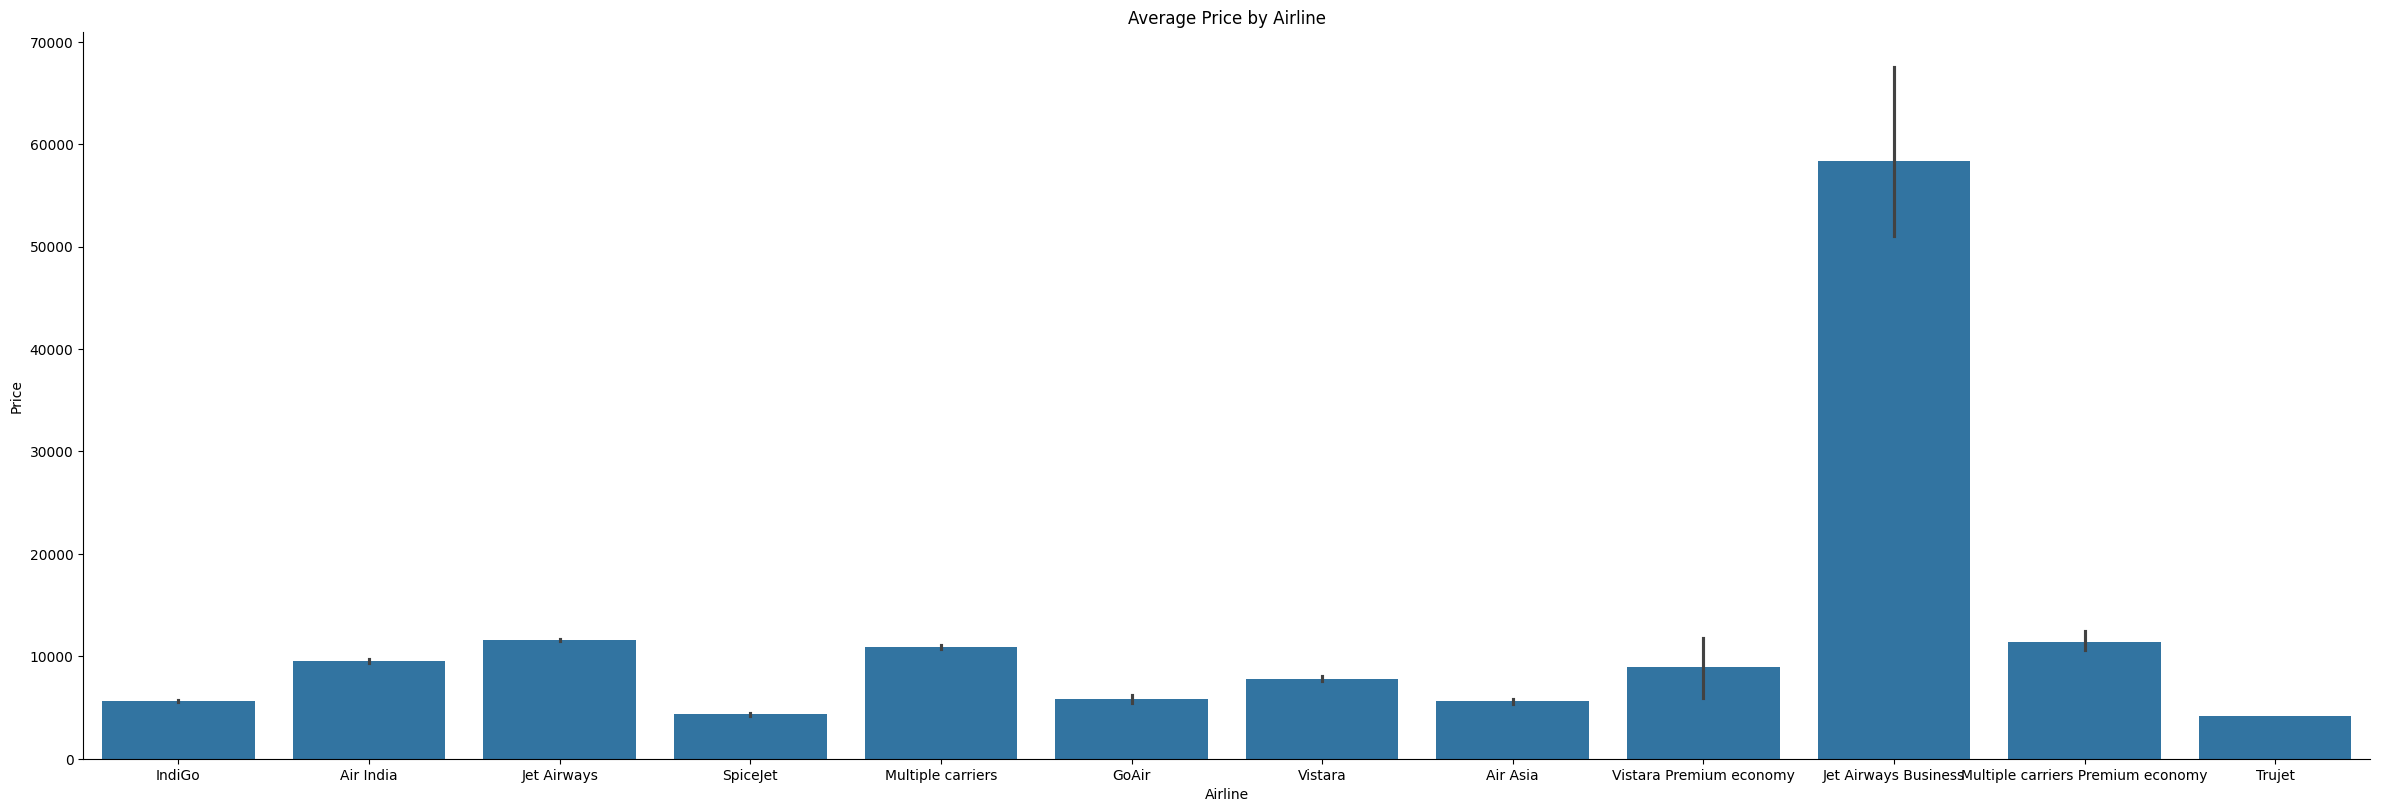

In [10]:
# Bar plot
sns.catplot(x='Airline', y='Price', kind='bar', data=train_df, height=8,aspect=3)
plt.title('Average Price by Airline')
plt.show()

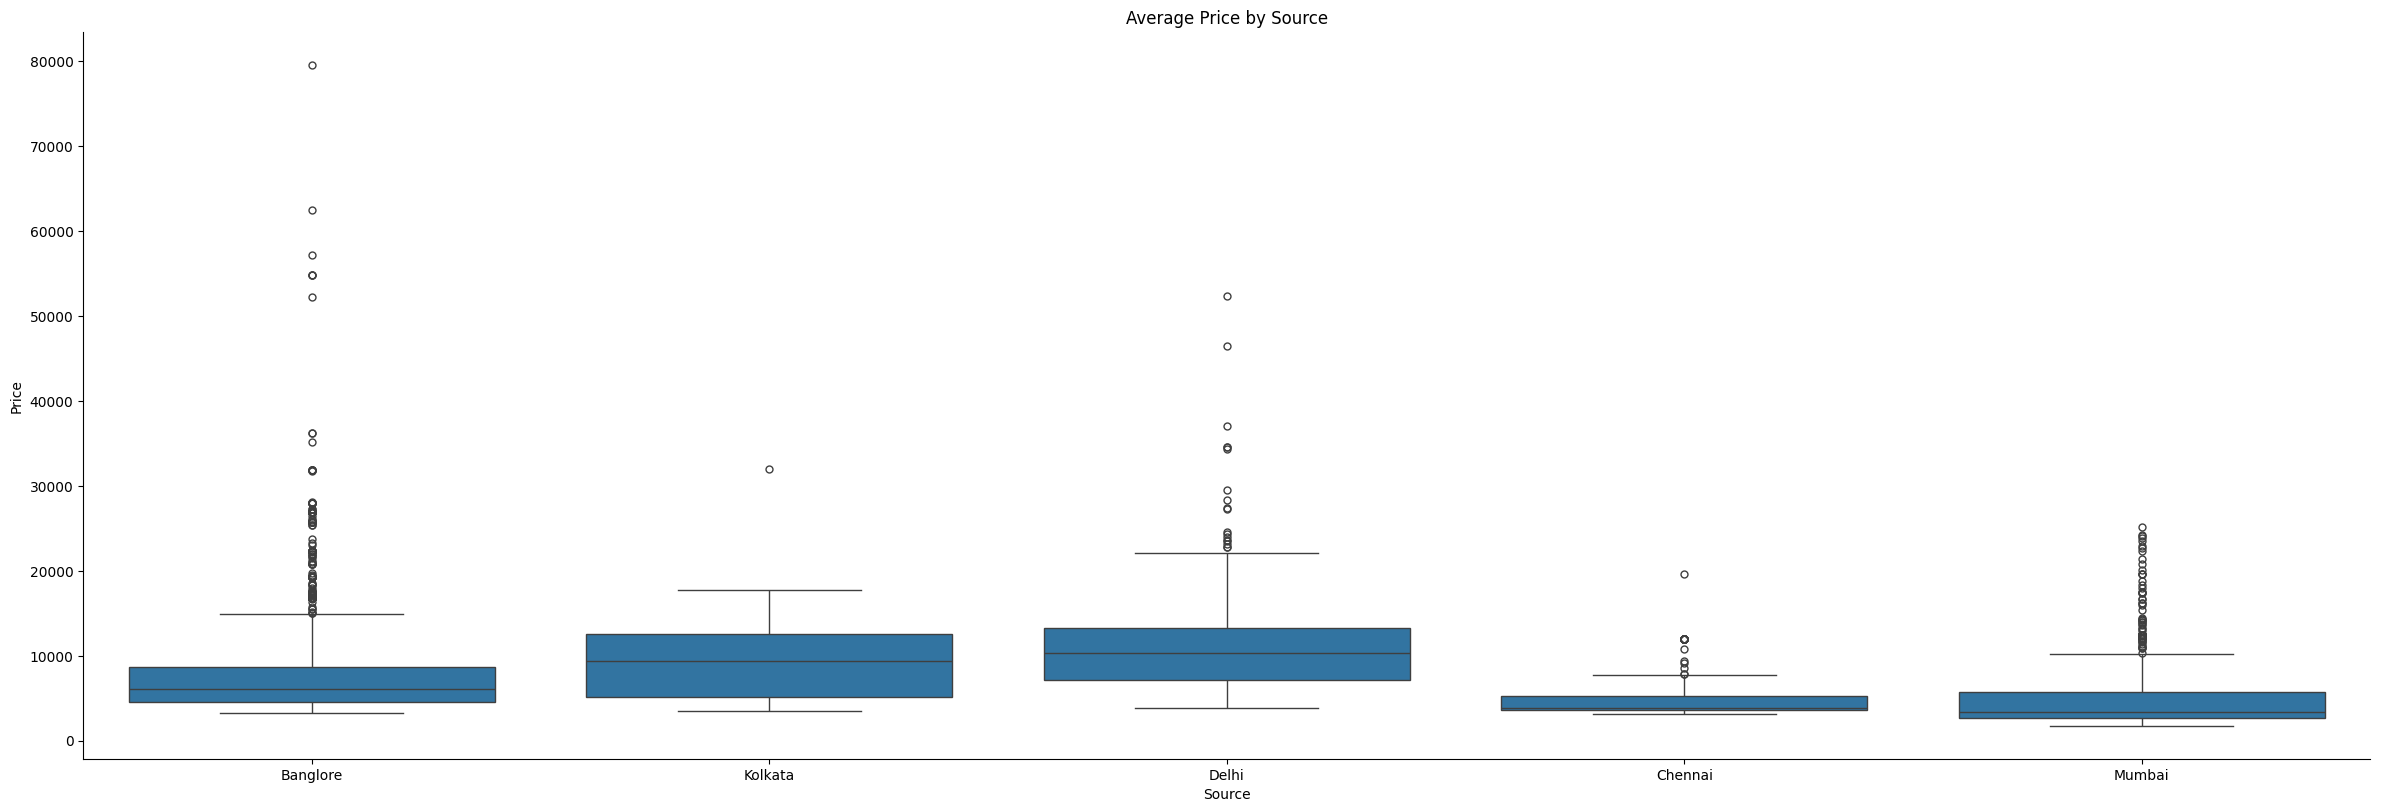

In [11]:
# Box plot
sns.catplot(x='Source', y='Price', kind='box', data=train_df, height=8,aspect=3)
plt.title('Average Price by Source')
plt.show()

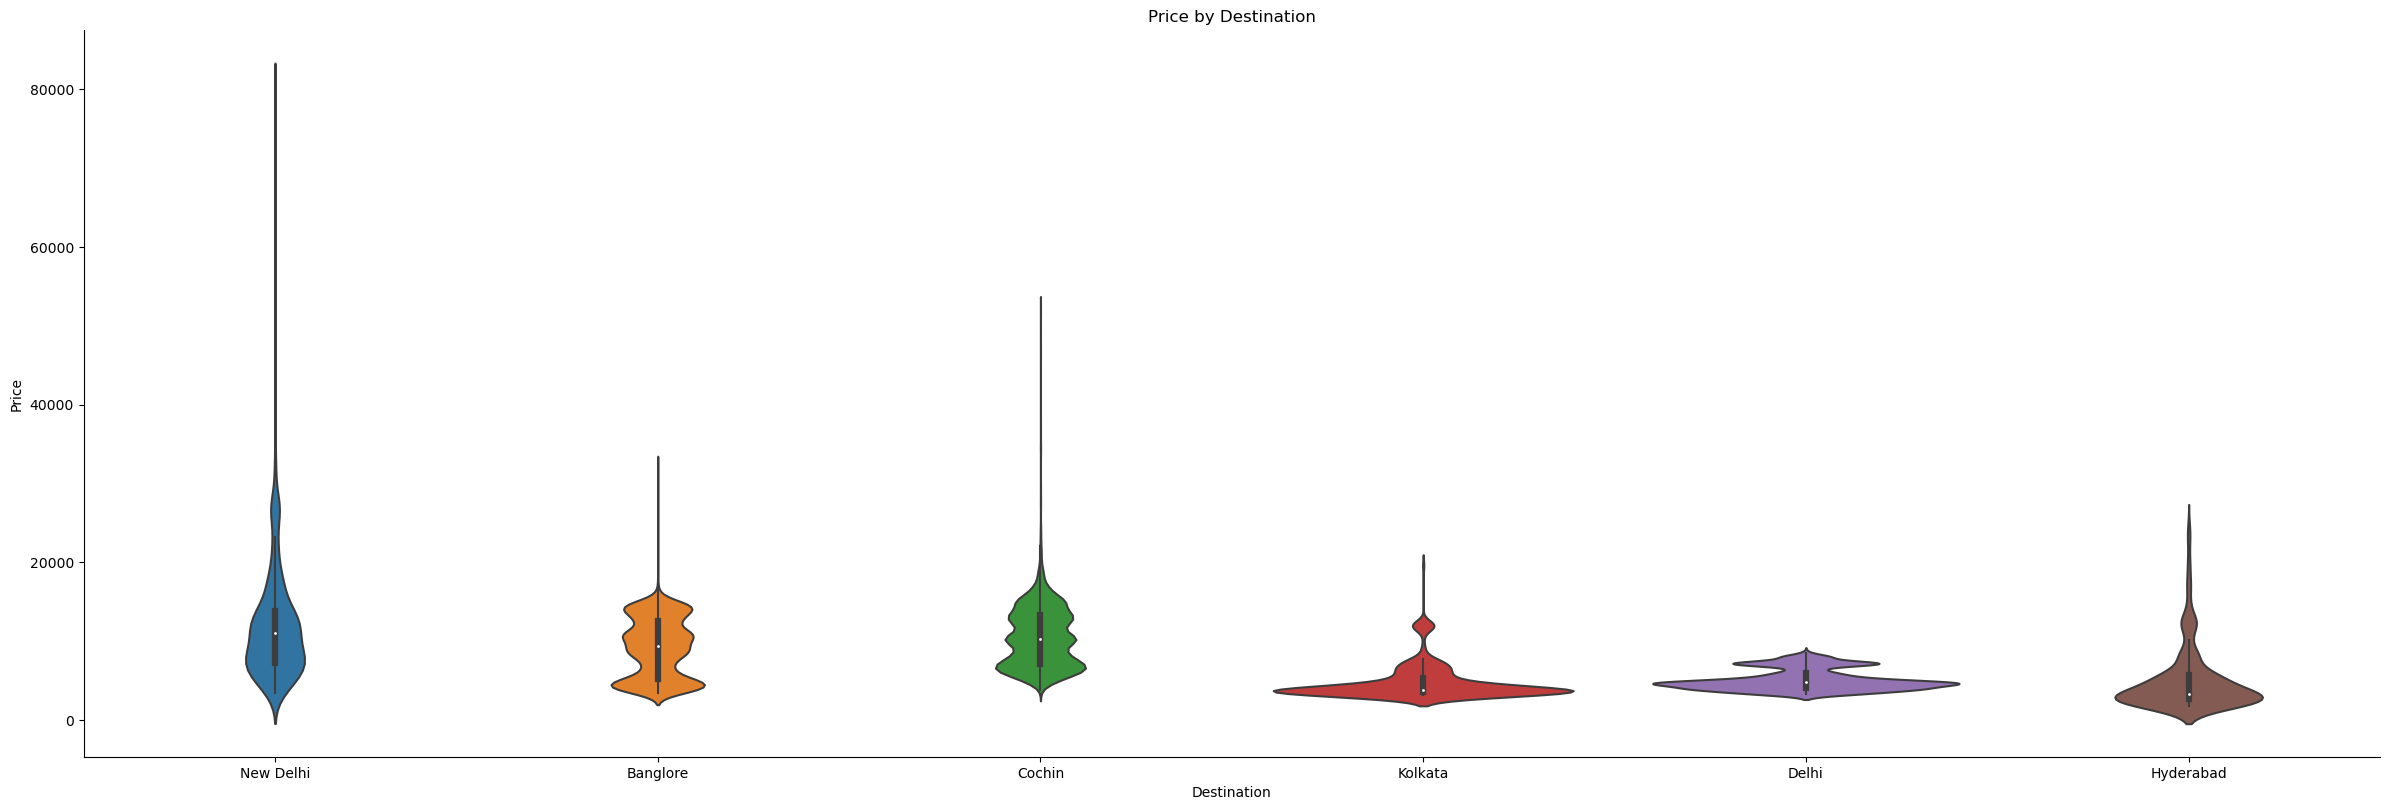

In [ ]:
# Violin plot
sns.catplot(x='Destination', y='Price', kind='violin', data=train_df,height=8,aspect=3)
plt.title('Price by Destination')
plt.show()

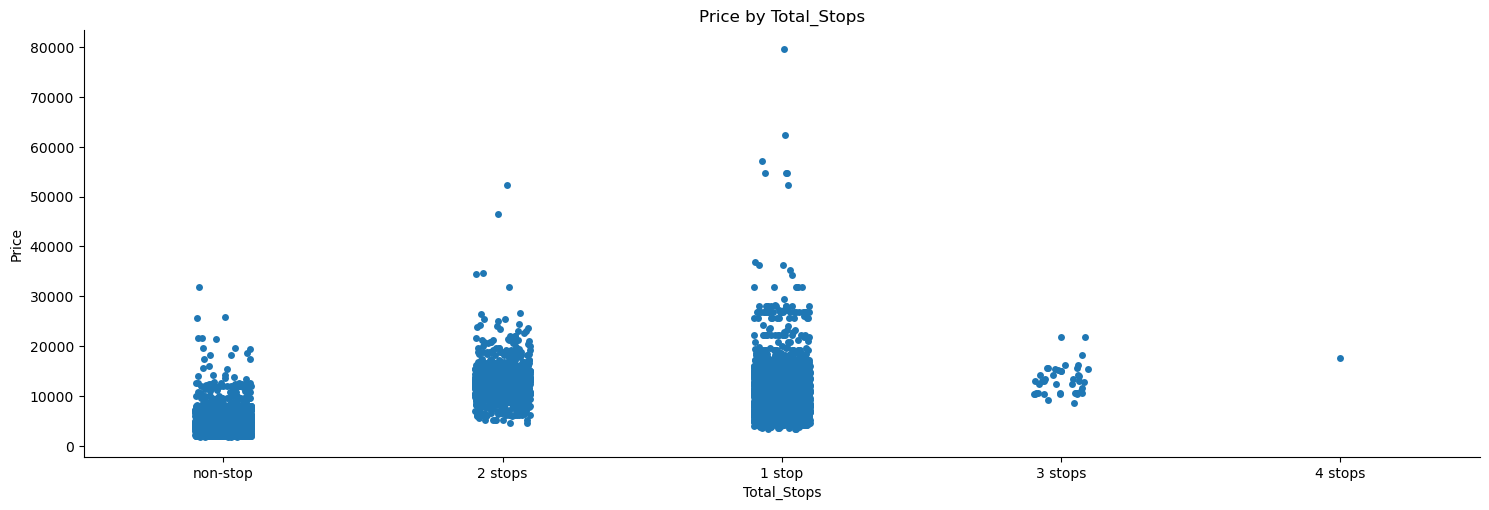

In [ ]:
# Strip plot
sns.catplot(x='Total_Stops', y='Price', kind='strip', data=train_df,aspect=3)
plt.title('Price by Total_Stops')
plt.show()

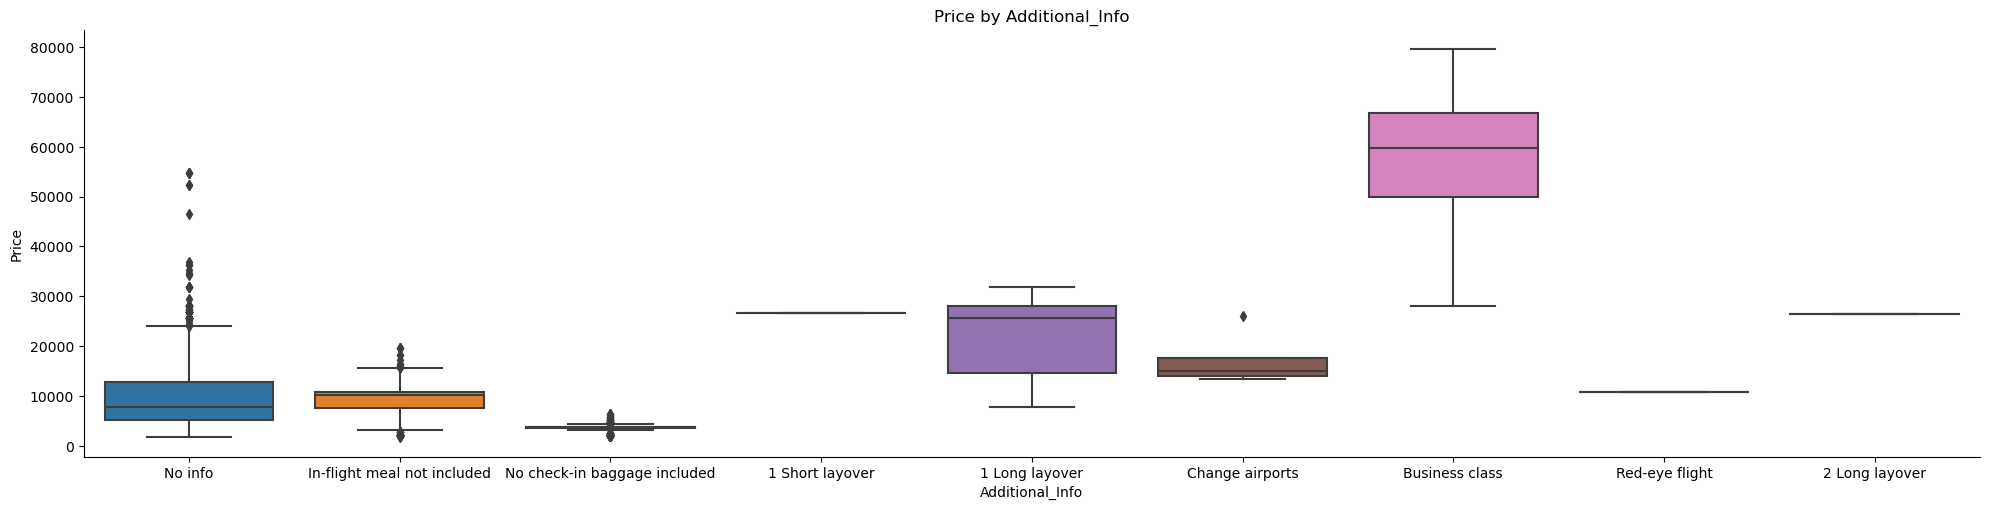

In [ ]:
# Swarm plot
sns.catplot(x='Additional_Info', y='Price', kind='box', data=train_df, aspect=4)
plt.title('Price by Additional_Info')
plt.show()

***Test Dataset Analysis (ignoring this for a while)***

In [12]:
test_df=pd.read_excel("archive/Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [18]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [20]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [21]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [22]:
test_df[test_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [23]:
test_df.duplicated().sum()

26

In [79]:
test_df.drop_duplicates(inplace=True,keep="first")

In [25]:
test_df.shape

(2645, 10)

In [80]:
# Remove duplicates, keeping the first occurrence
test_df.drop_duplicates(subset=test_df.columns.difference(['Additional_Info']), keep='first', inplace=True)

In [27]:
test_df.shape

(2569, 10)

***Analyzing categorical columns***

In [ ]:
test_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [ ]:
test_df["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

***Feature Engineering***

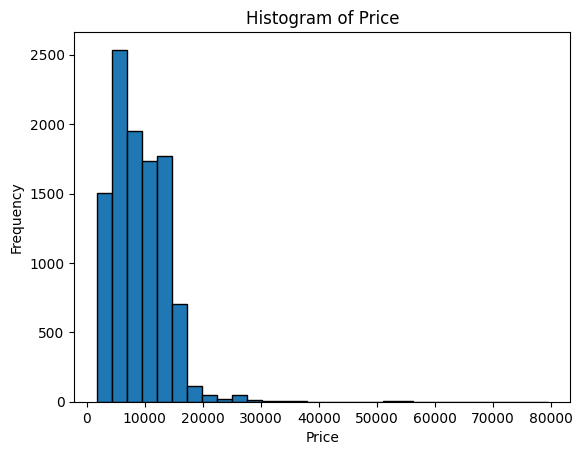

In [30]:
plt.hist(train_df['Price'], bins=30, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [81]:
train_df['Log_Price'] = np.log1p(train_df['Price'])  # log1p is equivalent to log(Price + 1)

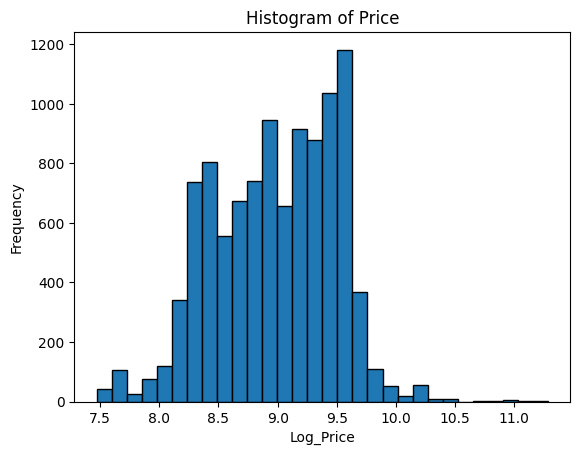

In [32]:
plt.hist(train_df['Log_Price'], bins=30, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Log_Price')
plt.ylabel('Frequency')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

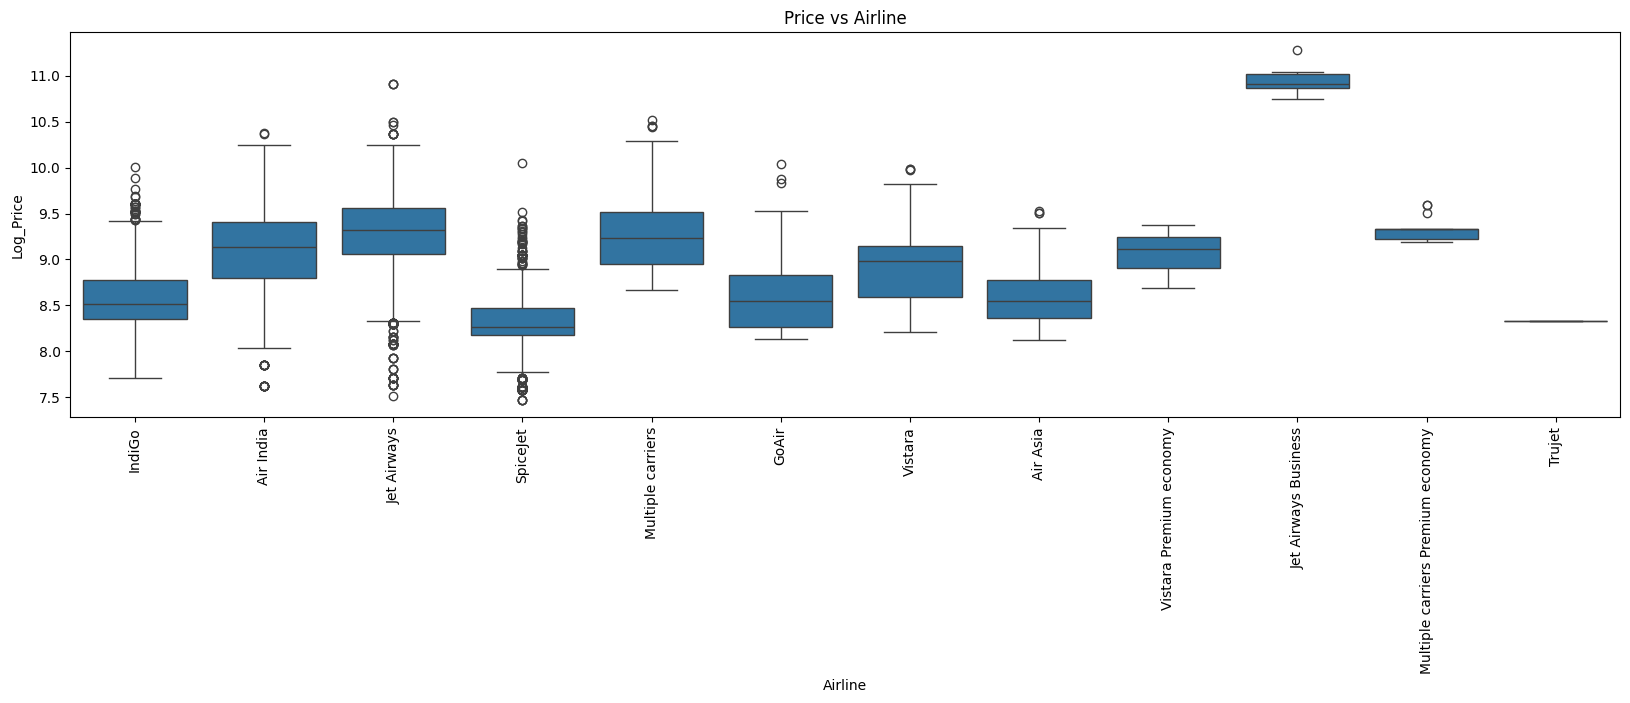

In [33]:
plt.figure(figsize=(20,5))
plt.title("Price vs Airline")
sns.boxplot(x="Airline", y="Log_Price", data=train_df)
plt.xlabel("Airline")
plt.ylabel("Log_Price")
plt.xticks(rotation=90)

In [82]:
# Group by 'Airline' and calculate z-scores for 'Price' within each group
train_df['z_score'] = train_df.groupby('Airline')['Log_Price'].transform(lambda x: stats.zscore(x))

# Define a threshold for z-scores to consider as an outlier
z_score_threshold = 3

# Filter out outliers
train_df_no_outliers = train_df[train_df['z_score'].abs() < z_score_threshold]

# Drop the 'z_score' column as it's no longer needed
train_df_no_outliers = train_df_no_outliers.drop(columns=['z_score'])

# Check the result
train_df_no_outliers.sample(5)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Log_Price
24,Jet Airways,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,08:15:00,13h 20m,1 stop,In-flight meal not included,7757,8.956480
6348,IndiGo,1/05/2019,Mumbai,Hyderabad,BOM → HYD,16:55,18:25:00,1h 30m,non-stop,No info,3175,8.063378
4257,IndiGo,21/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20:00,2h 55m,non-stop,No info,6144,8.723394
8811,Jet Airways,27/05/2019,Banglore,Delhi,BLR → DEL,17:45,20:45:00,3h,non-stop,No info,7229,8.885994
9509,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:00:00,6h,1 stop,No info,15554,9.652137


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy')])

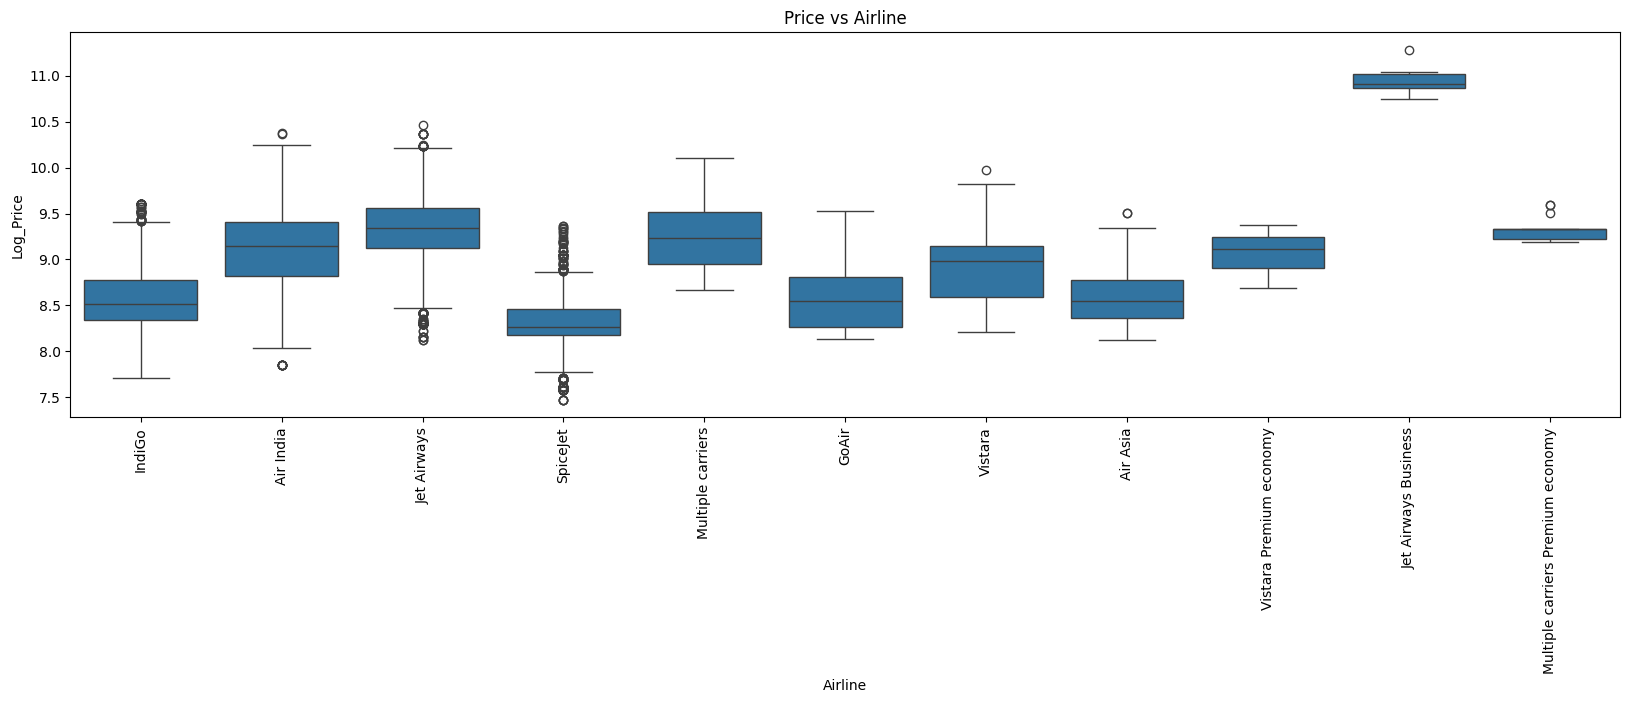

In [36]:
plt.figure(figsize=(20,5))
plt.title("Price vs Airline")
sns.boxplot(x="Airline", y="Log_Price", data=train_df_no_outliers)
plt.xlabel("Airline")
plt.ylabel("Log_Price")
plt.xticks(rotation=90)

In [84]:
train_df_no_outliers.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Log_Price
5375,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,12:35:00,1630,2 stops,No info,13882,9.538420
7031,Air India,12/05/2019,Kolkata,Banglore,CCU → GAU → IMF → DEL → BLR,09:50,23:15:00,805,3 stops,No info,14015,9.547955
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50:00,175,non-stop,No info,4823,8.481359
303,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25:00,1375,2 stops,In-flight meal not included,10368,9.246576
10392,Jet Airways,15/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25:00,1760,2 stops,No info,15339,9.638219


In [83]:
train_df_no_outliers['Duration']=train_df_no_outliers['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

AttributeError: Can only use .str accessor with string values!

In [85]:
train_df_no_outliers['Day_of_Journey']=train_df_no_outliers['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df_no_outliers['Month_of_Journey']=train_df_no_outliers['Date_of_Journey'].str.split('/').str[1].astype(int)

In [86]:
train_df_no_outliers['Date_of_Journey'] = pd.to_datetime(train_df_no_outliers['Date_of_Journey'])
# Extract the day of the week (Monday=0, Sunday=6)
train_df_no_outliers['DayOfWeek'] = train_df_no_outliers['Date_of_Journey'].dt.dayofweek

# Create a new column 'IsWeekend' where 1 indicates the date is a weekend (Saturday=5, Sunday=6)
train_df_no_outliers['IsWeekend'] = train_df_no_outliers['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\Hp Aero\AppData\Local\Temp\ipykernel_8276\3089018719.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_df_no_outliers['Date_of_Journey'] = pd.to_datetime(train_df_no_outliers['Date_of_Journey'])


In [87]:
train_df_no_outliers.drop(['Date_of_Journey'],axis=1,inplace=True)

In [96]:
train_df_no_outliers.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Log_Price,Day_of_Journey,Month_of_Journey,DayOfWeek,IsWeekend,Dep_hour,Dep_min,Arr_hour,Arr_min
6869,Jet Airways,Delhi,Cochin,DEL → BOM → COK,300,1 stop,In-flight meal not included,10262,9.236300,12,6,2,0,14,0,19,0
8458,Jet Airways,Delhi,Cochin,DEL → BOM → COK,805,1 stop,In-flight meal not included,10262,9.236300,9,6,6,1,15,0,4,25
5090,Multiple carriers Premium economy,Delhi,Cochin,DEL → BOM → COK,440,1 stop,No info,11269,9.329900,21,3,3,0,6,0,13,20
822,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,1760,2 stops,No info,15129,9.624435,9,5,3,0,23,5,4,25
1695,IndiGo,Delhi,Cochin,DEL → COK,185,non-stop,No info,5406,8.595450,21,3,3,0,14,30,17,35


In [89]:
train_df_no_outliers["Dep_hour"] = pd.to_datetime(train_df_no_outliers["Dep_Time"]).dt.hour
train_df_no_outliers["Dep_min"] = pd.to_datetime(train_df_no_outliers["Dep_Time"]).dt.minute
train_df_no_outliers.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\Hp Aero\AppData\Local\Temp\ipykernel_8276\673445718.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df_no_outliers["Dep_hour"] = pd.to_datetime(train_df_no_outliers["Dep_Time"]).dt.hour
C:\Users\Hp Aero\AppData\Local\Temp\ipykernel_8276\673445718.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df_no_outliers["Dep_min"] = pd.to_datetime(train_df_no_outliers["Dep_Time"]).dt.minute


In [95]:
train_df_no_outliers["Arrival_Time"] = train_df_no_outliers["Arrival_Time"].astype(str)
# Split the time into hour and minute
train_df_no_outliers["Arr_hour"] = train_df_no_outliers["Arrival_Time"].str.split(':').str[0].astype(int)
train_df_no_outliers["Arr_min"] = train_df_no_outliers["Arrival_Time"].str.split(':').str[1].astype(int)

# Drop the original Arrival_Time column
train_df_no_outliers.drop(["Arrival_Time"], axis=1, inplace=True)

In [97]:
train_df_no_outliers['Log_Price_per_Duration'] = train_df_no_outliers['Log_Price'] / train_df_no_outliers['Duration']

In [98]:
def categorize_time_of_day(time):
    if 5 <= time < 12:
        return 'Morning'
    elif 12 <= time < 17:
        return 'Afternoon'
    elif 17 <= time < 21:
        return 'Evening'
    else:
        return 'Night'

train_df_no_outliers['Part_of_Day'] = train_df_no_outliers['Dep_hour'].apply(categorize_time_of_day)

In [138]:
#scaler = StandardScaler()
#train_df[['Duration', 'Price']] = scaler.fit_transform(train_df[['Duration', 'Price']])

In [99]:
train_df_no_outliers.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Log_Price,Day_of_Journey,Month_of_Journey,DayOfWeek,IsWeekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Log_Price_per_Duration,Part_of_Day
8349,Jet Airways,Delhi,Cochin,DEL → COK,195,non-stop,No info,9564,9.165866,6,6,3,0,11,0,14,15,0.047004,Morning
1726,Jet Airways,Delhi,Cochin,DEL → BOM → COK,550,1 stop,No info,17024,9.742438,6,3,2,0,19,15,4,25,0.017714,Evening
10234,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,735,1 stop,In-flight meal not included,10844,9.291459,21,5,1,0,20,0,8,15,0.012641,Evening
5402,Air India,Delhi,Cochin,DEL → AMD → BOM → COK,1410,2 stops,No info,9968,9.207236,9,6,6,1,19,45,19,15,0.006530,Evening
269,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,900,1 stop,In-flight meal not included,13502,9.510667,6,3,2,0,14,5,5,5,0.010567,Afternoon


In [100]:
train_df_no_outliers['Duration_bin'] = pd.cut(train_df_no_outliers['Duration'], bins=[0, 2, 5, 10, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])

In [101]:
#Airline and Duration Interaction: Combine Airline with Duration to create interaction terms. This can help capture specific patterns for each airline.
train_df_no_outliers['Airline_Duration'] = train_df_no_outliers['Airline'] + '_' + train_df_no_outliers['Duration_bin'].astype(str)
train_df_no_outliers = pd.get_dummies(train_df_no_outliers, columns=['Airline_Duration'], drop_first=True)

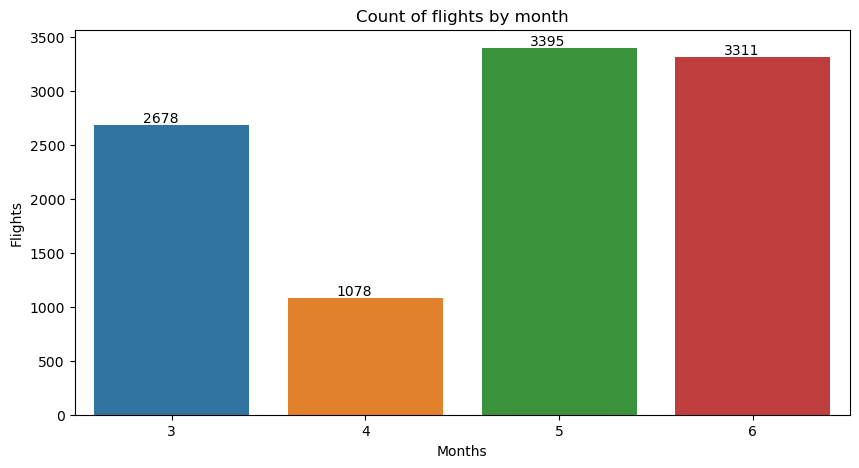

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Count of flights by month')
a=sns.countplot(x="Month_of_Journey",data=train_df)
plt.xlabel('Months')
plt.ylabel('Flights')
for p in a.patches:
    a.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va='bottom',color='black')

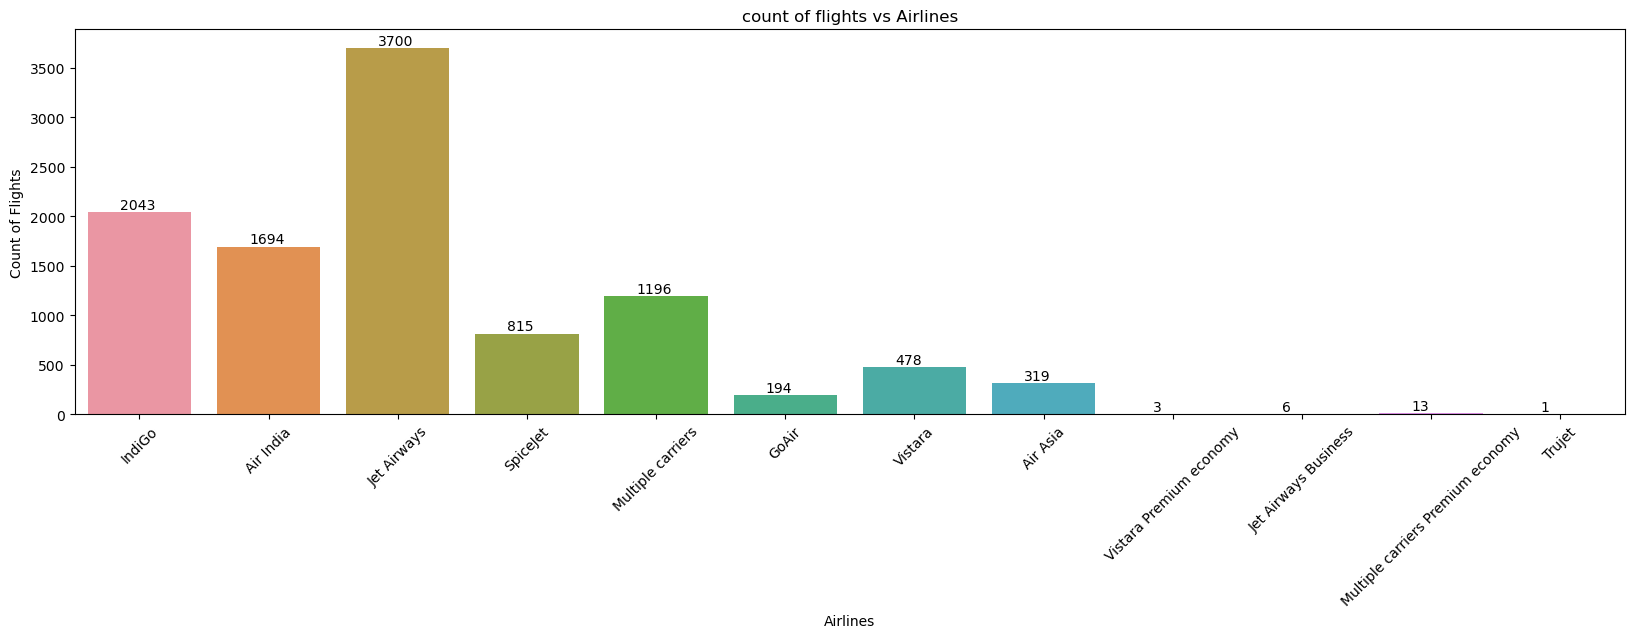

In [ ]:
plt.figure(figsize=(20,5))
plt.title("count of flights vs Airlines")
b=sns.countplot(x="Airline",data=train_df)
plt.xlabel("Airlines")
plt.ylabel("Count of Flights")
plt.xticks(rotation = 45)
for p in b.patches:
    b.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),va='bottom',color='black')


In [102]:
test_df['Day_of_Journey']=test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df['Month_of_Journey']=test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [103]:
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\Hp Aero\AppData\Local\Temp\ipykernel_8276\3826470131.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
C:\Users\Hp Aero\AppData\Local\Temp\ipykernel_8276\3826470131.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute


In [104]:
test_df["Arr_hour"]=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arr_min"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute
test_df.drop(["Arrival_Time"],axis=1,inplace=True)

TypeError: <class 'datetime.time'> is not convertible to datetime, at position 0

In [37]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


***Correlation between all Features***

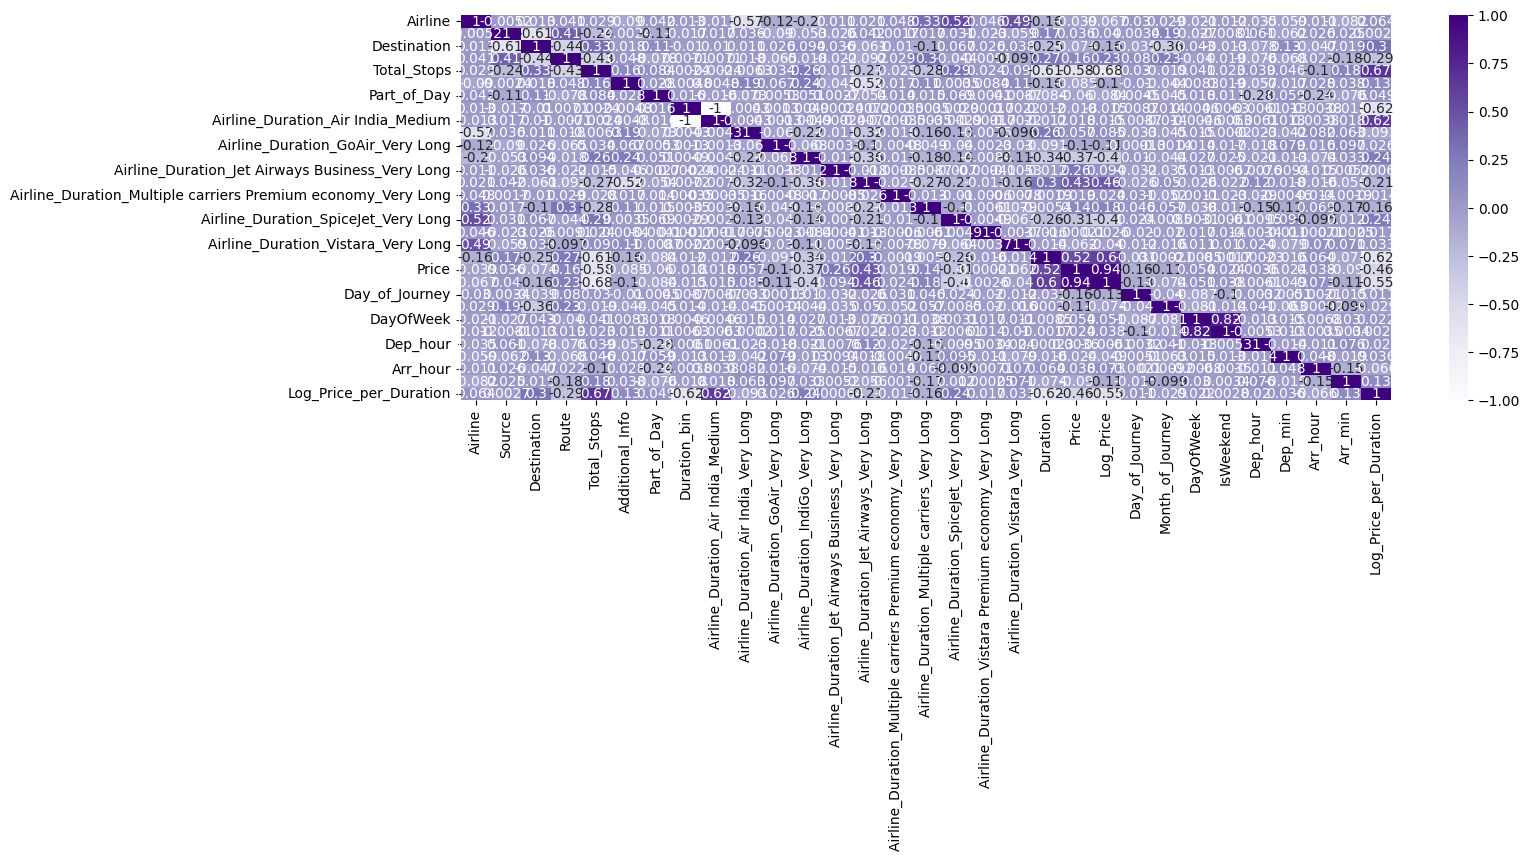

In [109]:
plt.figure(figsize=(15,5))
sns.heatmap(X.corr(),annot=True,cmap="Purples")
plt.show()

C:\Users\Hp Aero\AppData\Local\Temp\ipykernel_10076\1568193712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True,cmap="Spectral")


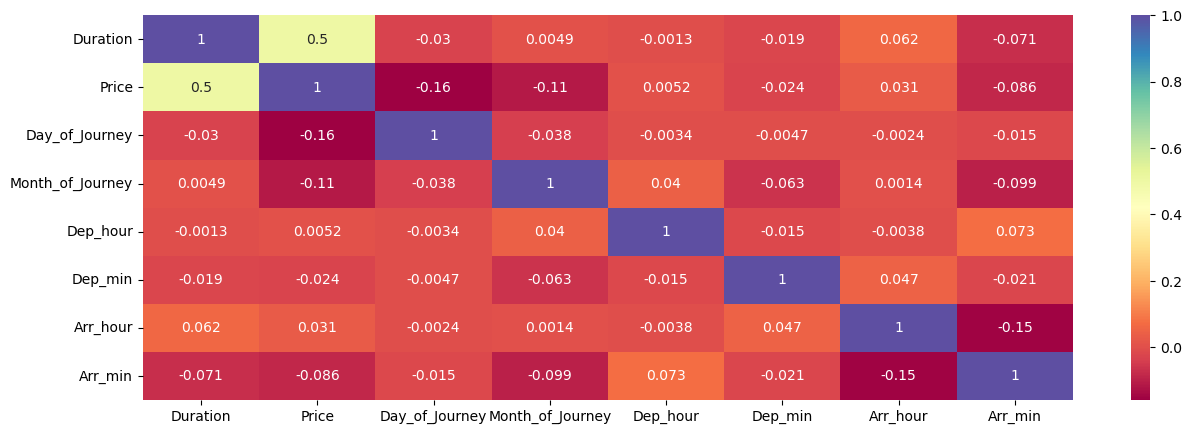

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(train_df.corr(),annot=True,cmap="Spectral")
plt.show()

In [106]:
train_categorical_data = train_df_no_outliers.select_dtypes(exclude=[np.number])
train_numerical_data = train_df_no_outliers.select_dtypes(include=[np.number])
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Part_of_Day,Duration_bin,Airline_Duration_Air India_Medium,Airline_Duration_Air India_Very Long,Airline_Duration_GoAir_Very Long,Airline_Duration_IndiGo_Very Long,Airline_Duration_Jet Airways Business_Very Long,Airline_Duration_Jet Airways_Very Long,Airline_Duration_Multiple carriers Premium economy_Very Long,Airline_Duration_Multiple carriers_Very Long,Airline_Duration_SpiceJet_Very Long,Airline_Duration_Vistara Premium economy_Very Long,Airline_Duration_Vistara_Very Long
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,Night,Very Long,False,False,False,True,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,Morning,Very Long,False,True,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,Morning,Very Long,False,False,False,False,False,True,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,Evening,Very Long,False,False,False,True,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,Afternoon,Very Long,False,False,False,True,False,False,False,False,False,False,False


In [67]:
test_categorical_data = test_df.select_dtypes(exclude=[np.number])
test_numerical_data = test_df.select_dtypes(include=[np.number])
test_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info


In [107]:
le=LabelEncoder()
train_categorical_data=train_categorical_data.apply(le.fit_transform)
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Part_of_Day,Duration_bin,Airline_Duration_Air India_Medium,Airline_Duration_Air India_Very Long,Airline_Duration_GoAir_Very Long,Airline_Duration_IndiGo_Very Long,Airline_Duration_Jet Airways Business_Very Long,Airline_Duration_Jet Airways_Very Long,Airline_Duration_Multiple carriers Premium economy_Very Long,Airline_Duration_Multiple carriers_Very Long,Airline_Duration_SpiceJet_Very Long,Airline_Duration_Vistara Premium economy_Very Long,Airline_Duration_Vistara_Very Long
0,3,0,5,18,4,7,3,1,0,0,0,1,0,0,0,0,0,0,0
1,1,3,0,82,1,7,2,1,0,1,0,0,0,0,0,0,0,0,0
2,4,2,1,116,1,7,2,1,0,0,0,0,0,1,0,0,0,0,0
3,3,3,0,89,0,7,1,1,0,0,0,1,0,0,0,0,0,0,0
4,3,0,5,29,0,7,0,1,0,0,0,1,0,0,0,0,0,0,0


In [69]:
test_categorical_data=test_categorical_data.apply(le.fit_transform)
test_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,4,2,1,76,0,5
1,3,3,0,65,0,5
2,4,2,1,76,0,3
3,6,2,1,76,0,5
4,0,0,2,16,4,5


In [108]:
X=pd.concat([train_categorical_data,train_numerical_data],axis=1)
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Part_of_Day,Duration_bin,Airline_Duration_Air India_Medium,Airline_Duration_Air India_Very Long,...,Log_Price,Day_of_Journey,Month_of_Journey,DayOfWeek,IsWeekend,Dep_hour,Dep_min,Arr_hour,Arr_min,Log_Price_per_Duration
0,3,0,5,18,4,7,3,1,0,0,...,8.268219,24,3,6,1,22,20,1,10,0.048637
1,1,3,0,82,1,7,2,1,0,1,...,8.944159,1,5,2,0,5,50,13,15,0.020099
2,4,2,1,116,1,7,2,1,0,0,...,9.538420,9,6,6,1,9,25,4,25,0.008367
3,3,3,0,89,0,7,1,1,0,0,...,8.735364,12,5,6,1,18,5,23,30,0.026878
4,3,0,5,29,0,7,0,1,0,0,...,9.495745,1,3,4,0,16,50,21,35,0.033318


In [110]:
data=X.drop(["Price"],axis=1)

In [111]:
Y=X['Price']

In [73]:
new_set=pd.concat([test_categorical_data,test_numerical_data],axis=1)
new_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,2,1,76,0,5,655,6,6,17,30,4,25
1,3,3,0,65,0,5,240,12,5,6,20,10,20
2,4,2,1,76,0,3,1425,21,5,19,15,19,0
3,6,2,1,76,0,5,780,21,5,8,0,21,0
4,0,0,2,16,4,5,170,24,6,23,55,2,45


In [112]:
x_train,x_test,y_train,y_test=train_test_split(data,Y,test_size=0.3,random_state=42)

In [113]:
x_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_bin,Airline_Duration_Air India_Medium,Airline_Duration_Air India_Very Long,Airline_Duration_GoAir_Very Long,...,Airline_Duration_Vistara_Very Long,Part_of_Day,Duration,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Log_Price_per_Duration
10564,9,0,2,18,4,8,1,0,0,0,...,1,3,-0.918323,12,5,21,0,23,50,0.658679
9529,1,0,5,24,0,8,1,0,1,0,...,0,2,0.529722,21,3,8,15,23,10,-0.647008
6722,4,3,0,64,0,8,1,0,0,0,...,0,2,-0.309146,18,5,8,25,16,20,-0.299129
2127,4,0,5,5,0,8,1,0,0,0,...,0,2,1.648211,1,3,8,0,8,15,-0.732227
1002,3,2,1,109,0,8,1,0,0,0,...,0,2,-0.409011,24,6,5,5,12,10,-0.285353


In [76]:
new_set = new_set.reindex(columns=x_train.columns)
new_set.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min
0,4,2,1,76,0,5,655,6,6,17,30,4,25
1,3,3,0,65,0,5,240,12,5,6,20,10,20
2,4,2,1,76,0,3,1425,21,5,19,15,19,0
3,6,2,1,76,0,5,780,21,5,8,0,21,0
4,0,0,2,16,4,5,170,24,6,23,55,2,45


In [113]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7268, 30)
The size of training output is (7268,)
The size of testing input is (3115, 30)
The size of testing output is (3115,)


***Gradient Boosting Regressor (early stopping)***

In [114]:
# Initialize the model
gbm = GradientBoostingRegressor(n_estimators=1000)

# Fit the model
gbm.fit(x_train, y_train)

# Custom early stopping
min_val_error = float('inf')
error_going_up = 0
early_stopping_rounds = 10

for i, y_pred in enumerate(gbm.staged_predict(x_test)):
    val_error = mse(y_test, y_pred)
    print(f"Round {i+1} - Validation Error: {val_error}")
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == early_stopping_rounds:
            print(f"Early stopping at round {i+1}")
            break

# Use the best number of estimators
best_n_estimators = i - early_stopping_rounds + 1
gbm_best = GradientBoostingRegressor(n_estimators=best_n_estimators)
gbm_best.fit(x_train, y_train)

# Evaluate on the test set
y_test_pred = gbm_best.predict(x_test)
mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Mean Squared Error for test set: {mse_test}")
print(f"R-Squared for test set: {r2_test}")
print(f"Mean Absolute Percentage Error for test set: {mape_test}%")

Round 1 - Validation Error: 18082495.043407798
Round 2 - Validation Error: 15128430.961882843
Round 3 - Validation Error: 12419192.54786955
Round 4 - Validation Error: 10397791.645227982
Round 5 - Validation Error: 8537723.504232964
Round 6 - Validation Error: 7196638.658010039
Round 7 - Validation Error: 6103570.081336179
Round 8 - Validation Error: 5196919.860787732
Round 9 - Validation Error: 4278897.000109855
Round 10 - Validation Error: 3538284.428465591
Round 11 - Validation Error: 2933557.2456958704
Round 12 - Validation Error: 2493377.8183651357
Round 13 - Validation Error: 2097474.5612436077
Round 14 - Validation Error: 1759127.956650722
Round 15 - Validation Error: 1513262.333418333
Round 16 - Validation Error: 1272746.976395265
Round 17 - Validation Error: 1077280.0710742713
Round 18 - Validation Error: 938468.420751513
Round 19 - Validation Error: 799299.6293290154
Round 20 - Validation Error: 684644.0667180989
Round 21 - Validation Error: 596077.1818823442
Round 22 - Valid

***Random Forest Regressor GridSearchCV***

In [46]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on train and test sets
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Train set Mean Squared Error: 785458.2889248315
Train set R-Squared: 0.9637202059630752
Train set Mean Absolute Percentage Error: 4.142132235293696%
Test set Mean Squared Error: 2342906.594429382
Test set R-Squared: 0.8871899052126565
Test set Mean Absolute Percentage Error: 8.05423099460323%


***Lasso Regression***

In [49]:
# Initialize the Lasso Regressor with a specific alpha value
alpha = 1.0  # You can adjust the alpha value as needed
lasso = Lasso(alpha=alpha, random_state=42)

# Fit the model
lasso.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")

Train set Mean Squared Error: 12662696.421289606
Train set R-Squared: 0.4151185052164409
Train set Mean Absolute Percentage Error: 31.859024886297938%
Test set Mean Squared Error: 11971053.686553506
Test set R-Squared: 0.4235981475764363
Test set Mean Absolute Percentage Error: 31.851933381618885%


***Lasso Regression Grid SearchCV***

In [50]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Initialize the model
lasso = Lasso(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best estimator
best_lasso = grid_search.best_estimator_

# Predict on train and test sets
y_train_pred = best_lasso.predict(x_train)
y_test_pred = best_lasso.predict(x_test)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train set Mean Squared Error: 12662696.421289606
Train set R-Squared: 0.4151185052164409
Train set Mean Absolute Percentage Error: 31.859024886297938%
Test set Mean Squared Error: 11971053.686553506
Test set R-Squared: 0.4235981475764363
Test set Mean Absolute Percentage Error: 31.851933381618885%


***Decision Tree Regressor***

In [115]:
# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Fit the model
tree.fit(x_train, y_train)

# Predict on train and test sets
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")

Train set Mean Squared Error: 0.0
Train set R-Squared: 1.0
Train set Mean Absolute Percentage Error: 0.0%
Test set Mean Squared Error: 113506.7492776886
Test set R-Squared: 0.9947712224932437
Test set Mean Absolute Percentage Error: 0.03896837557682125%


***Decision Tree Regressor GridSearchCV***

In [57]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
tree = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Predict on train and test sets
y_train_pred = best_tree.predict(x_train)
y_test_pred = best_tree.predict(x_test)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train set Mean Squared Error: 1418845.2700440795
Train set R-Squared: 0.9344644841192956
Train set Mean Absolute Percentage Error: 5.166384441703675%
Test set Mean Squared Error: 3855782.8372308924
Test set R-Squared: 0.8143454679833846
Test set Mean Absolute Percentage Error: 9.03367870200923%


***Decision Tree Hyperparameter Tuning with Cross-Validation***

In [58]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Predict on train and test sets
y_train_pred = best_tree.predict(x_train)
y_test_pred = best_tree.predict(x_test)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Train set Mean Squared Error: 1418845.2700440795
Train set R-Squared: 0.9344644841192956
Train set Mean Absolute Percentage Error: 5.166384441703675%
Test set Mean Squared Error: 3855782.8372308924
Test set R-Squared: 0.8143454679833846
Test set Mean Absolute Percentage Error: 9.03367870200923%


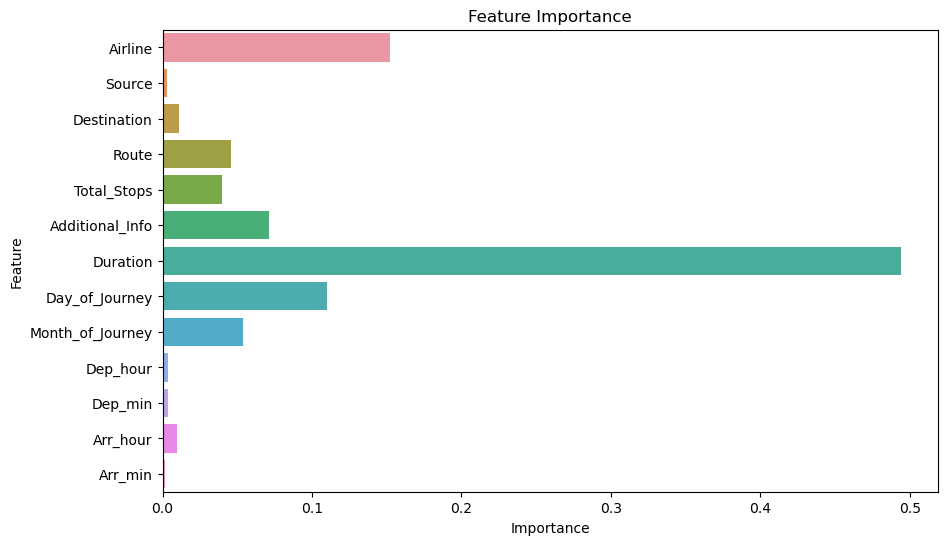

In [ ]:
# Plot feature importance
feature_importances = gbm.feature_importances_
features = x_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

***Droping less important features    (Not Worth it)***

In [52]:
# Dropping less important features
features_to_drop = ['Arr_min', 'Dep_min', 'Source', 'Destination','Dep_hour','Arr_hour']
X_train_reduced = x_train.drop(columns=features_to_drop)
X_test_reduced = x_test.drop(columns=features_to_drop)

***Decision Tree Regressor for reduced features***

In [54]:
# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Fit the model
tree.fit(X_train_reduced, y_train)

# Predict on train and test sets
y_train_pred = tree.predict(X_train_reduced)
y_test_pred = tree.predict(X_test_reduced)

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")

Train set Mean Squared Error: 343317.7414071476
Train set R-Squared: 0.9841423827043405
Train set Mean Absolute Percentage Error: 1.9294311043071621%
Test set Mean Squared Error: 4404896.213586621
Test set R-Squared: 0.7879058599414024
Test set Mean Absolute Percentage Error: 10.401907774657769%


***GBM for reduced features***

In [137]:
# ReInitialize the model
gbm_reduced = GradientBoostingRegressor(n_estimators=1000)

# Fit the model
gbm_reduced.fit(X_train_reduced, y_train)

# Custom early stopping
min_val_error_r = float('inf')
error_going_up_r= 0
early_stopping_rounds_r = 10

for i, y_pred_reduced in enumerate(gbm_reduced.staged_predict(X_test_reduced)):
    val_error_r = mse(y_test, y_pred_reduced)
    print(f"Round {i+1} - Validation Error: {val_error_r}")
    
    if val_error_r < min_val_error_r:
        min_val_error_r = val_error_r
        error_going_up_r = 0
    else:
        error_going_up_r += 1
        if error_going_up_r == early_stopping_rounds_r:
            print(f"Early stopping at round {i+1}")
            break

# Use the best number of estimators
best_n_estimators_r = i - early_stopping_rounds_r + 1
gbm_reduced_best = GradientBoostingRegressor(n_estimators=best_n_estimators_r)
gbm_reduced_best.fit(X_train_reduced, y_train)

# Evaluate on the test set
y_test_pred_reduced = gbm_reduced_best.predict(X_test_reduced)
mse_test_reduced = mse(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)
mape_test_reduced = mean_absolute_percentage_error(y_test, y_test_pred_reduced) * 100

print(f"Mean Squared Error for test set: {mse_test_reduced}")
print(f"R-Squared for test set: {r2_test_reduced}")
print(f"Mean Absolute Percentage Error for test set: {mape_test_reduced}%")

Round 1 - Validation Error: 18756925.61717416
Round 2 - Validation Error: 16940158.540634558
Round 3 - Validation Error: 15421364.920362221
Round 4 - Validation Error: 14183036.282219626
Round 5 - Validation Error: 13160113.777655749
Round 6 - Validation Error: 12322430.676170722
Round 7 - Validation Error: 11538574.69104204
Round 8 - Validation Error: 10778892.840685979
Round 9 - Validation Error: 10285065.077811679
Round 10 - Validation Error: 9917324.40047148
Round 11 - Validation Error: 9366248.862706434
Round 12 - Validation Error: 9033875.95203903
Round 13 - Validation Error: 8634370.752379246
Round 14 - Validation Error: 8446561.954997513
Round 15 - Validation Error: 8189165.867153179
Round 16 - Validation Error: 7959635.802364572
Round 17 - Validation Error: 7716724.586812598
Round 18 - Validation Error: 7533120.545647553
Round 19 - Validation Error: 7303445.032516917
Round 20 - Validation Error: 6993960.239141929
Round 21 - Validation Error: 6812511.226798914
Round 22 - Valida

***Evaluation for GBM without early stopping (deleted that GBM)***

In [ ]:
y_train_pred = gbm.predict(x_train)
mse_train=mse(y_train,y_train_pred)
r2_train=r2_score(y_train,y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100
print(f"Mean Squared Error for train set:{mse_train}")
print(f"R-Squared for train set:{r2_train}")
print(f"Mean Absolute Percentage Error for train set: {mape_train}%")

NameError: name 'gbm' is not defined

In [ ]:
y_test_pred=gbm.predict(x_test)
mse_test=mse(y_test,y_test_pred)
r2_test=r2_score(y_test,y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100
print(f"Mean Squared Error for test set:{mse_test}")
print(f"R-Squared for test set:{r2_test}")
print(f"Mean Absolute Percentage Error for test set: {mape_test}%")

Mean Squared Error for test set:3669498.822432716
R-Squared for test set:0.823314975097631
Mean Absolute Percentage Error for test set: 15.024179646034753%


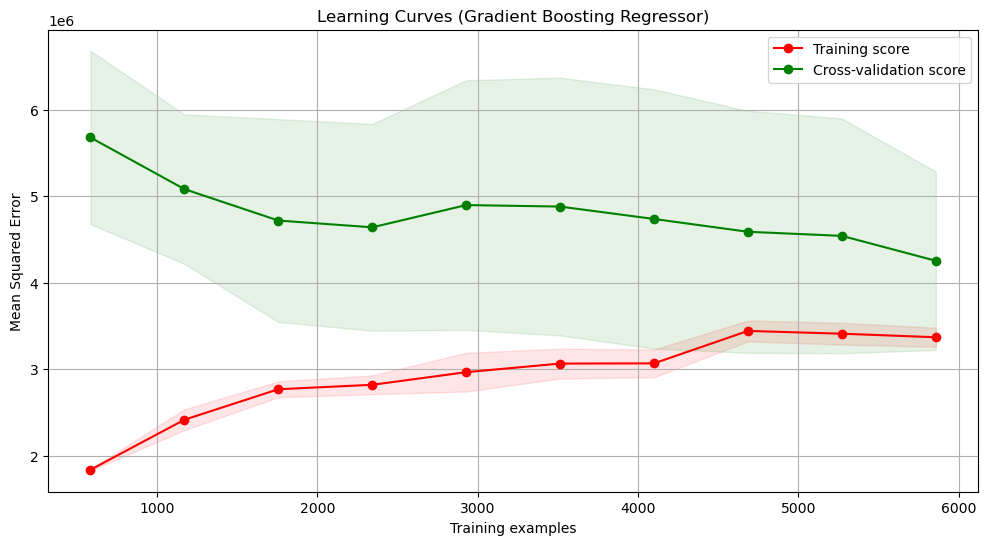

In [ ]:
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gbm, x_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the scores
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curves (Gradient Boosting Regressor)')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
# Predict prices for the new dataset
predicted_prices = gbm.predict(new_set)

# Add the predictions to the new dataset for reference
new_set['Price'] = predicted_prices

# Display the first few rows with the predicted prices
new_set.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arr_hour,Arr_min,Price
0,4,2,1,76,0,5,655,6,6,17,30,4,25,10186.610036
1,3,3,0,65,0,5,240,12,5,6,20,10,20,4299.347149
2,4,2,1,76,0,3,1425,21,5,19,15,19,0,13734.739690
3,6,2,1,76,0,5,780,21,5,8,0,21,0,8991.306382
4,0,0,2,16,4,5,170,24,6,23,55,2,45,3410.569957


***Deep learning model***

Epoch 1/100


c:\Users\Hp Aero\.conda\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 103460696.0000 - root_mean_squared_error: 10170.9600 - val_loss: 90002432.0000 - val_root_mean_squared_error: 9486.9609
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75016280.0000 - root_mean_squared_error: 8625.7568 - val_loss: 15936778.0000 - val_root_mean_squared_error: 3992.0894
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14478776.0000 - root_mean_squared_error: 3801.8174 - val_loss: 12761983.0000 - val_root_mean_squared_error: 3572.3918
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14330994.0000 - root_mean_squared_error: 3778.0027 - val_loss: 12369477.0000 - val_root_mean_squared_error: 3517.0266
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11835426.0000 - root_mean_squared_error: 3435.4114 - val_loss: 12159935.0000 - val_root_mean_squared_error: 3487.1099
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11575153.0000 - root_mean_squared_error: 3395.7380 - v

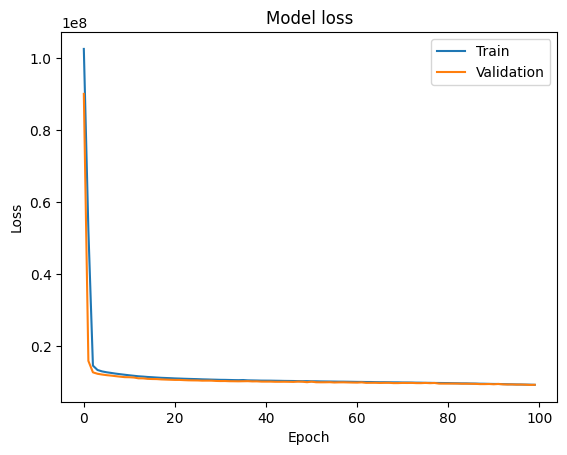

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss, train_rmse = model.evaluate(x_train_scaled, y_train, verbose=0)
test_loss, test_rmse = model.evaluate(x_test_scaled, y_test, verbose=0)

# Make predictions
y_train_pred = model.predict(x_train_scaled).flatten()
y_test_pred = model.predict(x_test_scaled).flatten()

# Calculate evaluation metrics
mse_train = mse(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) * 100

mse_test = mse(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) * 100

print(f"Train set Mean Squared Error: {mse_train}")
print(f"Train set R-Squared: {r2_train}")
print(f"Train set Mean Absolute Percentage Error: {mape_train}%")

print(f"Test set Mean Squared Error: {mse_test}")
print(f"Test set R-Squared: {r2_test}")
print(f"Test set Mean Absolute Percentage Error: {mape_test}%")

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
